In [327]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pandas as pd

from BSE import market_session

%reload_ext autoreload
%autoreload 2
# import some useful libraries to help us wrangle data, 
# plot data, and perform statistial analysis 
import scipy
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm


In [316]:
def av_datasets(k,f):
    trial=1
    df1 = pd.read_csv(f'Homog/Homog_Static/trial%02d_%.02f_strats.csv' % (k, f), header = None)

    df2 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
    trial += 1
    df3 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
    trial += 1
    df4 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)

    df_all = pd.concat([df1, df2, df3, df4], ignore_index=True)
    s = df_all.groupby(df_all.columns[1])
    ms = s.mean()
    return ms

In [315]:
def calc_total_pps(mean_df, start):
    time = 57

    b_sum = 0
    s_sum = 0
    for row in range(start*3600,255601, 3600):
        for col in range (8, 219 ,7):
            b_sum +=mean_df.loc[row][col]
        for col in range (225, 428,7):
            s_sum +=mean_df.loc[row][col]
   
                           
    return b_sum/57, s_sum/57
    
      
   
df = pd.DataFrame(columns = ['k', 'f', 'bt_15', 'st_15', 'total_15'])
# combinations = [(4,2),(5,2),(4,1.6), (7,2), (5,1.8), (4,0.2), (4,0.1), (4,0.7), (6,0.4), (4,0.5), (5,1.9), (6,2), (4,1.7)]
combinations = [ (4,0.1), (4,0.2), (4,0.5), (4,0.7), (4,1.6),(4,1.7),(4,2),(5,1.8),(5,1.9), (5,2),(6,0.4), (6,2),  (7,2)]


for (k,f) in combinations:
    mean_df = av_datasets(k,f)

    buyer_15, seller_15 = calc_total_pps(mean_df, 15)

    df.loc[len(df.index)] = [k, f, buyer_15, seller_15, buyer_15+seller_15]
    

display(df)


,k,f,bt_15,st_15,total_15
0,4.0,0.1,87.370938,212.877980,300.248918
1,4.0,0.2,102.678079,218.098826,320.776905
2,4.0,0.5,91.266643,214.056600,305.323243
3,4.0,0.7,101.360175,225.035987,326.396161
4,4.0,1.6,91.587498,262.104012,353.691510
5,4.0,1.7,85.395641,270.874128,356.269769
6,4.0,2.0,91.047759,270.628647,361.676406
7,5.0,1.8,89.952418,264.309238,354.261656
8,5.0,1.9,91.442668,266.870088,358.312756
9,5.0,2.0,94.737860,263.157738,357.895598


In [149]:
df.nlargest(5, 'bt_15')

,k,f,bt_15,st_15,total_15
5,4.0,0.2,102.678079,218.098826,320.776905
7,4.0,0.7,101.360175,225.035987,326.396161
1,5.0,2.0,94.737860,263.157738,357.895598
8,6.0,0.4,94.324290,219.321913,313.646203
2,4.0,1.6,91.587498,262.104012,353.691510


In [150]:
df.nlargest(5, 'st_15')

,k,f,bt_15,st_15,total_15
12,4.0,1.7,85.395641,270.874128,356.269769
0,4.0,2.0,91.047759,270.628647,361.676406
11,6.0,2.0,88.628845,268.724702,357.353547
10,5.0,1.9,91.442668,266.870088,358.312756
3,7.0,2.0,88.156791,265.780100,353.936892


In [151]:
df.nlargest(5, 'total_15')

,k,f,bt_15,st_15,total_15
0,4.0,2.0,91.047759,270.628647,361.676406
10,5.0,1.9,91.442668,266.870088,358.312756
1,5.0,2.0,94.737860,263.157738,357.895598
11,6.0,2.0,88.628845,268.724702,357.353547
12,4.0,1.7,85.395641,270.874128,356.269769


In [130]:
labels = [round(df.iloc[i][2],4) for i in df.index]
print(labels)

[0.0253, 0.0263, 0.0254, 0.0245, 0.025, 0.0285, 0.0243, 0.0282, 0.0262, 0.0254, 0.0254, 0.0246, 0.0237]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


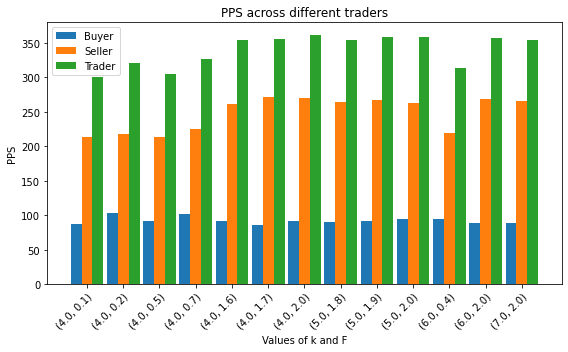

In [212]:
 # plot bar chart
labels = [(df.iloc[i][0],df.iloc[i][1]) for i in df.index]
buyer = [round(df.iloc[i][2],4) for i in df.index]
seller = [round(df.iloc[i][3],4) for i in df.index]
total = [round(df.iloc[i][4],4) for i in df.index]


x = np.arange(len(labels))  # the label locations
print(x)
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, buyer, width, label='Buyer')
rects2 = ax.bar(x, seller, width, label='Seller')
rects3 = ax.bar(x + width, total, width, label='Trader')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PPS')
ax.set_xlabel('Values of k and F')

ax.set_title('PPS across different traders')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
ax.legend()



fig.tight_layout()
plt.savefig('figures/homog_static_bar.png')


plt.show()


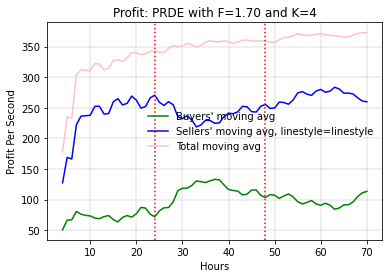

In [288]:
# dynamic homogenous

def av_hom_dy_datasets(k,f):
    trial=1

    df2 = pd.read_csv(f'Homog/Homog_dynamic/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
    trial += 1
    df3 = pd.read_csv(f'Homog/Homog_dynamic/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
    trial += 1
    df4 = pd.read_csv(f'Homog/Homog_dynamic/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)

    df_all = pd.concat([df1, df2, df3, df4], ignore_index=True)
    s = df_all.groupby(df_all.columns[1])
    ms = s.mean()
    return ms

def plot_sma_profit (df, k_value, f_value):
    buyer_sum = pd.DataFrame()
    seller_sum = pd.DataFrame()

    
    for row in range(0,255600, 3600):
        b_sum = 0
        s_sum = 0
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        buyer_sum.loc[len(buyer_sum.index), 0] = b_sum

        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
        seller_sum.loc[len(seller_sum.index), 0] = s_sum
      
   
   # calculate smooth moving average
    buyers_sma = buyer_sum.loc[:,0].rolling(5).mean()
    sellers_sma = seller_sum.loc[:,0].rolling(5).mean()
    total_sma =  buyers_sma + sellers_sma
    
    
    t_period = list(range(len(buyers_sma.index)))
    plt.plot(t_period, buyers_sma, color='green', label='Buyers\' moving avg')    
    plt.plot(t_period, sellers_sma, color='blue', label='Sellers\' moving avg'', linestyle=linestyle') 
    plt.plot(t_period, total_sma, color='pink', label='Total moving avg') 
    plt.axvline(x = 24, color = 'r', linestyle='dotted')
    plt.axvline(x = 48, color = 'r', linestyle='dotted')
    

    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second")
    plt.title(f"Profit: PRDE with F={f_value:.2f} and K={k_value}")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
    plt.savefig("figures/dynamic_static_sma")
    plt.show()

    

combinations = [(4,2),(5,2),(4,1.6), (7,2), (5,1.8), (4,0.2), (4,0.1), (4,0.7), (6,0.4), (4,0.5), (5,1.9), (6,2), (4,1.7)]
combinations = [(4,1.7)]

for (k,f) in combinations:
    mean_df = av_hom_dy_datasets(k,f)
    plot_sma_profit(mean_df, k, f)

In [ ]:

homo_dynamic_df = pd.DataFrame(columns = ['k', 'f', 'bt_15', 'bt_diff', 'st_15', 'st_diff','total_15', 'diff'])
combinations = [(4,2),(5,2),(4,1.6), (7,2), (5,1.8), (4,0.2), (4,0.1), (4,0.7), (6,0.4), (4,0.5), (5,1.9), (6,2), (4,1.7)]

for (i, (k,f)) in enumerate(combinations):
    mean_df = av_hom_dy_datasets(k,f)

    buyer_15, seller_15 = calc_total_pps(mean_df, 15)
    bt_diff = buyer_15 - df.iloc[i][2]
    st_diff = seller_15 - df.iloc[i][3]
    total = buyer_15+seller_15
    diff = total - df.iloc[i][4]
    

    homo_dynamic_df.loc[len(homo_dynamic_df.index)] = [k, f, buyer_15, bt_diff, seller_15, st_diff,total, diff]
    

display(homo_dynamic_df)


In [290]:
homo_dynamic_df.nlargest(5, 'bt_15')

,k,f,bt_15,bt_diff,st_15,st_diff,total_15,diff
1,5.0,2.0,107.588327,4.910248,254.355617,36.256791,361.943944,41.167039
6,4.0,0.1,107.237405,16.189646,219.728934,-50.899714,326.966339,-34.710067
10,5.0,1.9,104.052073,9.727783,253.652668,34.330755,357.704741,44.058538
12,4.0,1.7,102.147920,13.991129,256.662732,-9.117369,358.810651,4.873760
8,6.0,0.4,100.311212,8.868544,229.743494,-37.126594,330.054707,-28.258050


In [291]:
homo_dynamic_df.nlargest(5, 'st_15')

,k,f,bt_15,bt_diff,st_15,st_diff,total_15,diff
0,4.0,2.0,96.477676,9.106738,267.702413,54.824433,364.180089,63.931171
11,6.0,2.0,94.929247,6.300402,264.254813,-4.469889,359.184060,1.830513
4,5.0,1.8,90.030147,-1.557351,263.807609,1.703597,353.837756,0.146246
3,7.0,2.0,96.290667,-5.069508,258.792953,33.756967,355.083620,28.687459
12,4.0,1.7,102.147920,13.991129,256.662732,-9.117369,358.810651,4.873760


In [193]:
print(homo_dynamic_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrrrrrrr}
\toprule
   k &    f &  bt\_15 &  bt\_diff &  st\_15 &  st\_diff &  total\_15 &  diff \\
\midrule
4.00 & 2.00 &  96.48 &     5.43 & 267.70 &    -2.93 &    364.18 &  2.50 \\
5.00 & 2.00 & 107.59 &    12.85 & 254.36 &    -8.80 &    361.94 &  4.05 \\
4.00 & 1.60 &  99.46 &     7.88 & 255.04 &    -7.07 &    354.50 &  0.81 \\
7.00 & 2.00 &  96.29 &     8.13 & 258.79 &    -6.99 &    355.08 &  1.15 \\
5.00 & 1.80 &  90.03 &     0.08 & 263.81 &    -0.50 &    353.84 & -0.42 \\
4.00 & 0.20 &  95.52 &    -7.16 & 224.28 &     6.18 &    319.80 & -0.98 \\
4.00 & 0.10 & 107.24 &    19.87 & 219.73 &     6.85 &    326.97 & 26.72 \\
4.00 & 0.70 &  92.75 &    -8.61 & 231.66 &     6.62 &    324.41 & -1.99 \\
6.00 & 0.40 & 100.31 &     5.99 & 229.74 &    10.42 &    330.05 & 16.41 \\
4.00 & 0.50 &  89.06 &    -2.20 & 225.18 &    11.12 &    314.24 &  8.92 \\
5.00 & 1.90 & 104.05 &    12.61 & 253.65 &   -13.22 &    357.70 & -0.61 \\
6.00 & 2.00 &  94.93 &     6.30 & 264.25 &    -4.47

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


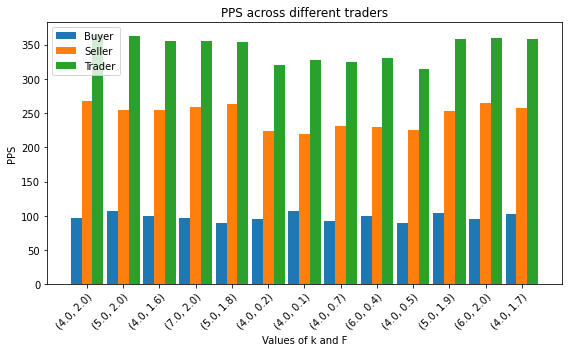

In [195]:
 # plot bar chart
labels = [(homo_dynamic_df.iloc[i][0],homo_dynamic_df.iloc[i][1]) for i in homo_dynamic_df.index]
buyer = [round(homo_dynamic_df.iloc[i][2],4) for i in homo_dynamic_df.index]
seller = [round(homo_dynamic_df.iloc[i][4],4) for i in homo_dynamic_df.index]
total = [round(homo_dynamic_df.iloc[i][6],4) for i in homo_dynamic_df.index]


x = np.arange(len(labels))  # the label locations
print(x)
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, buyer, width, label='Buyer')
rects2 = ax.bar(x, seller, width, label='Seller')
rects3 = ax.bar(x + width, total, width, label='Trader')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PPS')
ax.set_xlabel('Values of k and F')

ax.set_title('PPS across different traders')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
ax.legend()



fig.tight_layout()
plt.savefig('figures/homog_dynamic_bar.png')


plt.show()


In [204]:
homo_dynamic_df.nlargest(5, 'bt_15')

,k,f,bt_15,bt_diff,st_15,st_diff,total_15,diff
1,5.0,2.0,107.588327,12.850466,254.355617,-8.802121,361.943944,4.048346
6,4.0,0.1,107.237405,19.866467,219.728934,6.850954,326.966339,26.717421
10,5.0,1.9,104.052073,12.609405,253.652668,-13.217420,357.704741,-0.608015
12,4.0,1.7,102.147920,16.752278,256.662732,-14.211396,358.810651,2.540882
8,6.0,0.4,100.311212,5.986922,229.743494,10.421582,330.054707,16.408504


In [205]:
homo_dynamic_df.nlargest(5, 'st_15')

,k,f,bt_15,bt_diff,st_15,st_diff,total_15,diff
0,4.0,2.0,96.477676,5.429918,267.702413,-2.926235,364.180089,2.503683
11,6.0,2.0,94.929247,6.300402,264.254813,-4.469889,359.184060,1.830513
4,5.0,1.8,90.030147,0.077729,263.807609,-0.501629,353.837756,-0.423900
3,7.0,2.0,96.290667,8.133876,258.792953,-6.987147,355.083620,1.146729
12,4.0,1.7,102.147920,16.752278,256.662732,-14.211396,358.810651,2.540882


In [206]:
homo_dynamic_df.nlargest(5, 'total_15')

,k,f,bt_15,bt_diff,st_15,st_diff,total_15,diff
0,4.0,2.0,96.477676,5.429918,267.702413,-2.926235,364.180089,2.503683
1,5.0,2.0,107.588327,12.850466,254.355617,-8.802121,361.943944,4.048346
11,6.0,2.0,94.929247,6.300402,264.254813,-4.469889,359.184060,1.830513
12,4.0,1.7,102.147920,16.752278,256.662732,-14.211396,358.810651,2.540882
10,5.0,1.9,104.052073,12.609405,253.652668,-13.217420,357.704741,-0.608015


## one-in-many

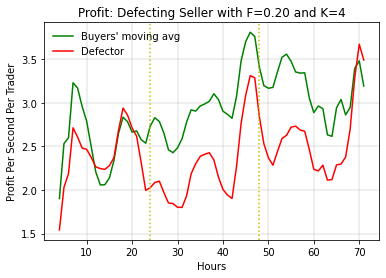

In [286]:
# dynamic homogenous

def av_het_dy_datasets(k,f):
    trial=1

    df1 = pd.read_csv(f'one_in_many_dynamic_seller/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)

    return df1

def plot_sma_profit (df, k_value, f_value):
    buyer_sum = pd.DataFrame()
    seller_sum = pd.DataFrame()
    defector = pd.DataFrame()
    for row in range(len(df.index)):
        b_sum = 0
        s_sum = 0
        for col in range (15, 219 ,7):
            b_sum +=df.loc[row][col]
        buyer_sum.loc[len(buyer_sum.index), 0] = b_sum/29
        
        defector.loc[len(defector.index), 0] =df.loc[row][8]
        
#         for col in range (232, 428,7):
#             s_sum +=df.loc[row][col]
#         seller_sum.loc[len(seller_sum.index), 0] = s_sum/29
        
   
   # calculate smooth moving average
    buyers_sma = buyer_sum.loc[:,0].rolling(5).mean()
#     sellers_sma = seller_sum.loc[:,0].rolling(5).mean()
    defector_sma = defector.loc[:,0].rolling(5).mean()
    
    
    
    t_period = list(range(len(defector_sma.index)))
    plt.plot(t_period, buyers_sma, color='green', label='Buyers\' moving avg')    
#     plt.plot(t_period, sellers_sma, color='blue', label='Sellers\' moving avg') 
#     plt.plot(t_period, total_sma, color='pink', label='Total moving avg') 
    plt.plot(t_period, defector_sma, color='red', label='Defector') 
    
    plt.axvline(x = 24, color = 'y', linestyle='dotted')
    plt.axvline(x = 48, color = 'y', linestyle='dotted')
    

    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second Per Trader")
    plt.title(f"Profit: Defecting Seller with F={f_value:.2f} and K={k_value}")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
    plt.savefig("figures/dynamic_OIM_buyer_sma")
    plt.show()

    

# combinations = [ (4,0.1), (4,0.2), (4,0.5), (4,0.7), (4,1.6),(4,1.7),(4,2),(5,1.8),(5,1.9), (5,2),(6,0.4), (6,2),  (7,2)]
combinations = [(4,0.2)]

for (k,f) in combinations:
    mean_df = av_het_dy_datasets(k,f)
    plot_sma_profit(mean_df, k, f)

In [282]:
# dynamic homogenous


def calc_total_pps_def(mean_df, start):
    time = 57

    b_sum = 0
    s_sum = 0
    def_sum = 0
    for row in range(len(mean_df.index)):
#         for col in range (15, 219 ,7):
#             b_sum +=mean_df.loc[row][col]
        for col in range (232, 428,7):
            s_sum +=mean_df.loc[row][col]
        def_sum +=mean_df.loc[row][225]
        
   
                           
    return s_sum/(time*29), def_sum/time

oim_dynamic_df = pd.DataFrame(columns = ['k', 'f', 'st_15', 'defactor', 'profit diff'])


combinations = [ (4,0.1), (4,0.2), (4,0.5), (4,0.7), (4,1.6),(4,1.7),(4,2),(5,1.8),(5,1.9), (5,2),(6,0.4), (6,2),  (7,2)]
# combinations = [(4,2)]
for (i, (k,f)) in enumerate(combinations):
    mean_df = av_het_dy_datasets(k,f)

    seller_15, defector = calc_total_pps_def(mean_df, 15)
    diff = defector - seller_15

    oim_dynamic_df.loc[len(oim_dynamic_df.index)] = [k, f, seller_15, defector, diff]
    

display(oim_dynamic_df)



,k,f,st_15,defactor,profit diff
0,4.0,0.1,9.246683,10.552936,1.306253
1,4.0,0.2,9.630407,12.797638,3.167231
2,4.0,0.5,9.335194,11.381632,2.046439
3,4.0,0.7,9.119577,8.359195,-0.760382
4,4.0,1.6,9.404144,11.572288,2.168144
5,4.0,1.7,9.347842,7.294799,-2.053043
6,4.0,2.0,9.038283,11.280844,2.242561
7,5.0,1.8,9.027913,10.528445,1.500533
8,5.0,1.9,9.129211,9.662078,0.532867
9,5.0,2.0,9.371667,12.464308,3.092641


In [283]:
print(oim_dynamic_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrrrr}
\toprule
   k &    f &  st\_15 &  defactor &  profit diff \\
\midrule
4.00 & 0.10 &   9.25 &     10.55 &         1.31 \\
4.00 & 0.20 &   9.63 &     12.80 &         3.17 \\
4.00 & 0.50 &   9.34 &     11.38 &         2.05 \\
4.00 & 0.70 &   9.12 &      8.36 &        -0.76 \\
4.00 & 1.60 &   9.40 &     11.57 &         2.17 \\
4.00 & 1.70 &   9.35 &      7.29 &        -2.05 \\
4.00 & 2.00 &   9.04 &     11.28 &         2.24 \\
5.00 & 1.80 &   9.03 &     10.53 &         1.50 \\
5.00 & 1.90 &   9.13 &      9.66 &         0.53 \\
5.00 & 2.00 &   9.37 &     12.46 &         3.09 \\
6.00 & 0.40 &   9.17 &     11.45 &         2.27 \\
6.00 & 2.00 &   8.77 &      7.75 &        -1.03 \\
7.00 & 2.00 &   9.09 &     10.39 &         1.30 \\
\bottomrule
\end{tabular}



In [292]:
## prde-best

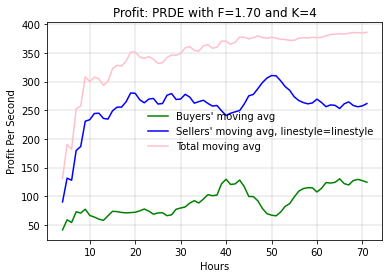

In [304]:
def av_prde(k,f):
    trial=1
    df1 = pd.read_csv(f'prde-best_homog_stat/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
#     trial+=1
#     df2 = pd.read_csv(f'prde-best_homog_stat/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
#     trial+=1
#     df3 = pd.read_csv(f'prde-best_homog_stat/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)

#      df_all = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
#     s = df_all.groupby(df_all.columns[1])
#     ms = s.mean()
#     return ms


    return df1

def plot_sma_profit (df, k_value, f_value):
    buyer_sum = pd.DataFrame()
    seller_sum = pd.DataFrame()

    
    for row in range(len(df.index)):
        b_sum = 0
        s_sum = 0
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        buyer_sum.loc[len(buyer_sum.index), 0] = b_sum

        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
        seller_sum.loc[len(seller_sum.index), 0] = s_sum
      
   
   # calculate smooth moving average
    buyers_sma = buyer_sum.loc[:,0].rolling(5).mean()
    sellers_sma = seller_sum.loc[:,0].rolling(5).mean()
    total_sma =  buyers_sma + sellers_sma
    
    
    t_period = list(range(len(buyers_sma.index)))
    plt.plot(t_period, buyers_sma, color='green', label='Buyers\' moving avg')    
    plt.plot(t_period, sellers_sma, color='blue', label='Sellers\' moving avg'', linestyle=linestyle') 
    plt.plot(t_period, total_sma, color='pink', label='Total moving avg') 
    
    

    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second")
    plt.title(f"Profit: PRDE with F={f_value:.2f} and K={k_value}")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
    plt.savefig("figures/prde-best-sma_1")
    plt.show()

combinations = [(4,0.2)]
#                ], (4,0.1), (4,2.0),(5,1.9) ]

for (k,f) in combinations:
    mean_df = av_prde(k,f)
    plot_sma_profit(mean_df, k, f)

    
#     plot_sma_profit('prde-best_homog_stat/test_strats.csv')

In [311]:
def calc_total_pps(mean_df, start):
    time = 57

    b_sum = 0
    s_sum = 0
    for row in range(start*3600,255601, 3600):
        for col in range (8, 219 ,7):
            b_sum +=mean_df.loc[row][col]
        for col in range (225, 428,7):
            s_sum +=mean_df.loc[row][col]
   
                           
    return b_sum/57, s_sum/57
    
      
   
df = pd.DataFrame(columns = ['k', 'f', 'bt_15', 'st_15', 'total_15'])

combinations = [(4,0.2), (4,0.1), (4,2.0),(5,1.9)]

for (k,f) in combinations:
    mean_df = av_prde(k,f)
    mean_df = av_datasets(k,f)

    buyer_15, seller_15 = calc_total_pps(mean_df, 15)

    df.loc[len(df.index)] = [k, f, buyer_15, seller_15, buyer_15+seller_15]
    

display(df)
print(df.to_latex(index=False, float_format="%.2f"))

#4.0	0.2	102.678079	218.098826	320.776905
#7	4.0	0.7	101.360175	225.035987	326.396161

#12	4.0	1.7	85.395641	270.874128	356.269769
#0	4.0	2.0	91.047759	270.628647	361.676406

,k,f,bt_15,st_15,total_15
0,4.0,0.2,102.678079,218.098826,320.776905
1,4.0,0.1,87.370938,212.877980,300.248918
2,4.0,2.0,91.047759,270.628647,361.676406
3,5.0,1.9,91.442668,266.870088,358.312756


\begin{tabular}{rrrrr}
\toprule
   k &    f &  bt\_15 &  st\_15 &  total\_15 \\
\midrule
4.00 & 0.20 & 102.68 & 218.10 &    320.78 \\
4.00 & 0.10 &  87.37 & 212.88 &    300.25 \\
4.00 & 2.00 &  91.05 & 270.63 &    361.68 \\
5.00 & 1.90 &  91.44 & 266.87 &    358.31 \\
\bottomrule
\end{tabular}



In [ ]:
 # plot bar chart
labels = [(4,0.2), (4,0.1), (4,2.0),(5,1.9)]
buyer = [round(homo_dynamic_df.iloc[i][2],4) for i in homo_dynamic_df.index]
seller = [round(homo_dynamic_df.iloc[i][4],4) for i in homo_dynamic_df.index]
total = [round(homo_dynamic_df.iloc[i][6],4) for i in homo_dynamic_df.index]


x = np.arange(len(labels))  # the label locations
print(x)
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, buyer, width, label='Buyer')
rects2 = ax.bar(x, seller, width, label='Seller')
rects3 = ax.bar(x + width, total, width, label='Trader')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PPS')
ax.set_xlabel('Values of k and F')

ax.set_title('PPS across different traders')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
ax.legend()



fig.tight_layout()
plt.savefig('figures/homog_dynamic_bar.png')


plt.show()


In [ ]:
# dynamic balanced
sup_range1 = (60, 60)
sup_range2 = (100,100)
dem_range1 = (140,140)
dem_range2 = (180,180)


n_days = 3
start_time = 0
end_time = 60 * 60 * 24 * n_days


supply_schedule = [{'from':start_time, 'to':end_time//3, 'ranges':[sup_range1], 'stepmode':'fixed'},
                        {'from':end_time//3, 'to':2*end_time//3, 'ranges':[sup_range2], 'stepmode':'fixed'},
                        {'from':2*end_time//3, 'to':end_time, 'ranges':[sup_range1], 'stepmode':'fixed'}
                      ]
demand_schedule = [{'from':start_time, 'to':end_time//3, 'ranges':[dem_range1], 'stepmode':'fixed'},
                        {'from':end_time//3, 'to':2*end_time//3, 'ranges':[dem_range2], 'stepmode':'fixed'},
                        {'from':2*end_time//3, 'to':end_time, 'ranges':[dem_range1], 'stepmode':'fixed'}
                      ]




order_interval = 5
order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'drip-poisson'}


dump_all = False
verbose = False

best_buyers = [(5,2), (4,0.1)]
best_sellers = [(4,2), (6,2)]



k1,f1 = best_buyers[0]
k2,f2 = best_buyers[1]


buyers_spec = [('PRDE', 15, {'f_value': f1, 'k': k1, 's_min': -1.0, 's_max': +1.0}), ('PRDE', 15, {'f_value': f2, 'k': k2, 's_min': -1.0, 's_max': +1.0})]
sellers_spec = [('PRDE', 15, {'f_value': f1, 'k': k1, 's_min': -1.0, 's_max': +1.0}), ('PRDE', 15, {'f_value': f2, 'k': k2, 's_min': -1.0, 's_max': +1.0})]
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}
trial = 1
while trial <= 5:
    trial_id = 'best2_dynamic/trialbuyers_%02d' % (trial)
    balances_file = open(trial_id + '_avg_balance.csv', 'w')
    market_session(trial_id, start_time, end_time, traders_spec,
                   order_sched, balances_file, True, True)
    balances_file.close()
    trial = trial + 1

    
k1,f1 = best_sellers[0]
k2,f2 = best_sellers[1]


buyers_spec = [('PRDE', 15, {'f_value': f1, 'k': k1, 's_min': -1.0, 's_max': +1.0}), ('PRDE', 15, {'f_value': f2, 'k': k2, 's_min': -1.0, 's_max': +1.0})]
sellers_spec = [('PRDE', 15, {'f_value': f1, 'k': k1, 's_min': -1.0, 's_max': +1.0}), ('PRDE', 15, {'f_value': f2, 'k': k2, 's_min': -1.0, 's_max': +1.0})]
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}
trial = 1
while trial <= 1:
    trial_id = 'best2_dynamic/trialsellers_%02d' % (trial)
    balances_file = open(trial_id + '_avg_balance.csv', 'w')
    market_session(trial_id, start_time, end_time, traders_spec,
                   order_sched, balances_file, True, True)
    balances_file.close()
    trial = trial + 1
    



In [324]:
def calc_total_profit(df, start):
#     df = pd.read_csv(filename, header=None)

    b_sum = 0
    s_sum = 0
    for row in range(start,72):
       
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
   
                           
    return b_sum
    
      
   
# df = pd.DataFrame(columns = ['k', 'f', 'bt_15', 'st_15', 'total_15'])
# # combinations = [(4,2),(5,2),(4,1.6), (7,2), (5,1.8), (4,0.2), (4,0.1), (4,0.7), (6,0.4), (4,0.5), (5,1.9), (6,2), (4,1.7)]
# combinations = [ (4,0.1), (4,0.2), (4,0.5), (4,0.7), (4,1.6),(4,1.7),(4,2),(5,1.8),(5,1.9), (5,2),(6,0.4), (6,2),  (7,2)]


# for (k,f) in combinations:
#     mean_df = av_datasets(k,f)

#     buyer_15, seller_15 = calc_total_pps(mean_df, 15)

#     df.loc[len(df.index)] = [k, f, buyer_15, seller_15, buyer_15+seller_15]
    

# display(df)
k = 4
f = 0.2
ps = []
trial=1
df1 = pd.read_csv(f'Homog/Homog_Static/trial%02d_%.02f_strats.csv' % (k, f), header = None)
ps.append(calc_total_profit(df1,15))

df2 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)

ps.append(calc_total_profit(df2,15))

trial += 1
df3 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
ps.append(calc_total_profit(df3,15))

trial += 1
df4 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
ps.append(calc_total_profit(df4,15))

print(ps)


k = 5
f = 2
ps2 = []
trial=1
df1 = pd.read_csv(f'Homog/Homog_Static/trial%02d_%.02f_strats.csv' % (k, f), header = None)
ps2.append(calc_total_profit(df1,15))

df2 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)

ps2.append(calc_total_profit(df2,15))

trial += 1
df3 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
ps2.append(calc_total_profit(df3,15))

trial += 1
df4 = pd.read_csv(f'static_homog_retry/trial%02d_%.02f_%02d_strats.csv' % (k, f, trial), header=None)
ps2.append(calc_total_profit(df4,15))

print(ps2)


[7165.288045999995, 5751.1086600000035, 6194.601555000006, 4299.603650999997]
[5290.198778000001, 5546.6987609999915, 5688.4932280000085, 5074.8413510000055]


In [328]:
scipy.stats.mannwhitneyu(ps, ps2)

MannwhitneyuResult(statistic=12.0, pvalue=0.34285714285714286)